# Lecture 07 - lab - 학습 rate, training/test 셋으로 성능평가

```
by Seokkyu Kong
Date: 2016-05-08
```

참고 자료: [모두를 위한 머신러닝/딥러닝 강의 - 홍콩과기대 김성훈교수님](http://hunkim.github.io/ml/)

참고 자료: ML lab 07 - 학습 rate, training/test 셋으로 성능평가
https://youtu.be/1vCOoBwYQVU

참고 자료: https://www.tensorflow.org/versions/r0.7/tutorials/mnist/beginners/index.html


Softmax regression model을 이용해서 tensorflow 의 필기체 숫자 인식 프로그램을 테스트해본다.

코드의 대부분은 강좌 랩에 나와 있는 부분을 인용했고, 강좌에 full source code가 없어서 tensorflow 홈페이지를 참조했다.

MNIST는 필기체 숫자 이미지 데이터 셋이다. 55000 개의 training set, 10000개의 test set, 5000개의 validation set으로 구성된다.

하나의 이미지는 28x28 크기를 갖는 이진 이미지이다.



In [1]:
%pylab inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# anaconda에 설치된 tensorflow 예제 mnist example에 대한 경로명을 추가한다.
import sys
sys.path.insert(1, '/root/anaconda2/lib/python2.7/site-packages/tensorflow/examples/tutorials/mnist')



Populating the interactive namespace from numpy and matplotlib


In [2]:
## Part 1: 이미지 데이터 로드
# -----------------------------
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
print mnist.train.labels[0:5, :]

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [4]:
## Part 2: 변수, 가설함수, cost function 및 gradient descent 정의
# ----------------------------------------------------------------
# 변수 선언
X = tf.placeholder(tf.float32, [None, 784]) # bias term 제외, 하나의 이미지는 28x28이다.
Y = tf.placeholder(tf.float32, [None, 10]) # one-hot encoding 때문에 10개로 선언한다.

# 모델의 파라미터 선언
W = tf.Variable(tf.random_uniform([784, 10], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([10]))


# 가설함수 정의
activation = tf.nn.softmax(tf.matmul(X, W) + b)


# cost function 정의
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(activation), reduction_indices=1))


# gradient descent를 위한 optimize 정의
# XXX: learning_rate도 변수로 선언해서 알파값이 달라질 경우의 비용곡선을 체크한다.
#learning_rate = tf.Variable(1.0)
learning_rate = tf.placeholder(tf.float32)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)


Epoch: 0001 , cost =  0.430522841 
Epoch: 0003 , cost =  0.243472192 
Epoch: 0005 , cost =  0.221026059 
Epoch: 0007 , cost =  0.210687438 
Epoch: 0009 , cost =  0.203573529 
Epoch: 0011 , cost =  0.199784888 
Epoch: 0013 , cost =  0.195162297 
Epoch: 0015 , cost =  0.193463782 
Epoch: 0017 , cost =  0.190524402 
Epoch: 0019 , cost =  0.189238796 
Optimizaiton finishied.


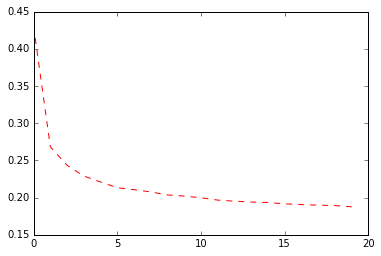

In [5]:
## Part 3: training dataset
# batch로 트레이닝한다.
# ------------------------------

# 변수 초기화 및 그래프 시작
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

# Using small batches of random data is called stochastic training
# 작은 배치 사이즈로 트레이닝한다. 이것은 stochastic training이라고도 한다.
# 전체 데이터로 하면 정확도가 높긴하지만, 비용이 많이 든다. 

# 아래 변수들을 적당히 조정해야 한다.
training_epochs = 20 # 전체 트레이닝 반복 횟수
batch_size = 100 # 한 번에 처리하는 데이터 사이즈
display_step = 2 # progress 표시
my_alpha = 1.0 # learning rate 알파벳 조정
arr_J = np.zeros(training_epochs) # cost 저장

# training 반복횟수만큼 루프실행
for epoch in range(training_epochs):
    avg_cost = 0;
    total_batch = int(mnist.train.num_examples / batch_size)
    
    # 전체 배치 수를 결정하고 각 배치에 대해서 루프를 실행한다.
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(train, feed_dict={X: batch_xs, Y: batch_ys, learning_rate: my_alpha})
    
        # cost를 계산한다.
        avg_cost += sess.run(cost, feed_dict = {X: batch_xs, Y: batch_ys, learning_rate: my_alpha}) / total_batch
    
    if epoch % display_step == 0:
        print "Epoch: %04d" % (epoch + 1), ", cost = ", "{:.9f} ".format(avg_cost)
    
    # cost를 plot한다.
    arr_J[epoch] = avg_cost

print "Optimizaiton finishied."
plot(arr_J, 'r--')




Label:  [9]
Prediction:  [9]


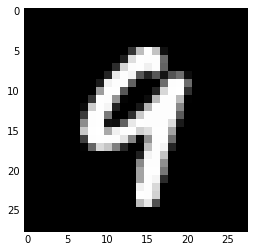

Accuracy:  91.9799983501


In [6]:
## Part 4: Predict & Show
# test set에서 임의로 하나의 이미지를 선택하고 예측한다.
# -----------------------------------------------------
# image를 보여준다.
r = randint(0, mnist.test.num_examples - 1)
# XXX: labels[r:r+1] 은 2차원 배열(행렬)로 반환한다. labels[r]은 1차원 벡터를 반환한다.
print "Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1))
print "Prediction: ", sess.run(tf.argmax(activation, 1), feed_dict = {X: mnist.test.images[r:r+1]})

# 이미지 출력
#plt.set_cmap('gray')
plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap="gray", interpolation="nearest")
plt.show()



## Part 4: test set에 대한 모델의 정확도를 계산한다.
# -----------------------------------------------------

# Test 모델 구축
# activation은 모델이 예측한 값을 가지고 있고, Y는 실제 label의 값이다.
# tf.argmax() 함수는 임의의 축(가로 또는 세로)에 대한 가장 높은 값을 갖는 인덱스를 반환한다.
correct_prediction = tf.equal(tf.argmax(activation,1), tf.argmax(Y,1))
# correct_prediction은 [True, False]와 같은 boolean 값을 갖는다. float으로 형변환 하면
# 1, 0 으로 바뀌게 되고 평균을 취한다.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# 정확도를 계산한다.
print "Accuracy: ", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}) * 100
#print "Accuracy: ", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels})

